# QTC Dataset Overview and Exploratory Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from tqdm.auto import tqdm

# Set style for visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

dataset = load_dataset('rokokot/question-complexity', 'base')
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print("\nDataset splits:", dataset.keys())

print(f"TyDi QA samples: {len(dataset['train'])}")
print(f"UD samples: {len(dataset['test'])}")

print("\nColumn names:", dataset['train'].column_names)
pd.DataFrame(dataset['train'][:5])

## Language Distribution Analysis

Having a good sense of how questions are distributed across different languages in both the training and test sets helps us understand potential biases.

Language distribution in training set:


,Language,Count,Percentage
0,fi,1193,15.713909
1,ru,1192,15.700738
2,en,1191,15.687566
3,ja,1189,15.661222
4,id,1065,14.027924
5,ar,994,13.092729
6,ko,768,10.115911



Language distribution in test set:


,Language,Count,Percentage
0,en,1022,29.761211
1,ru,909,26.470588
2,id,561,16.336634
3,ko,467,13.599301
4,fi,280,8.153757
5,ja,108,3.145020
6,ar,87,2.533489


/tmp/ipykernel_32243/3238455036.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=train_lang_dist, palette='viridis')
/tmp/ipykernel_32243/3238455036.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=test_lang_dist, palette='viridis')


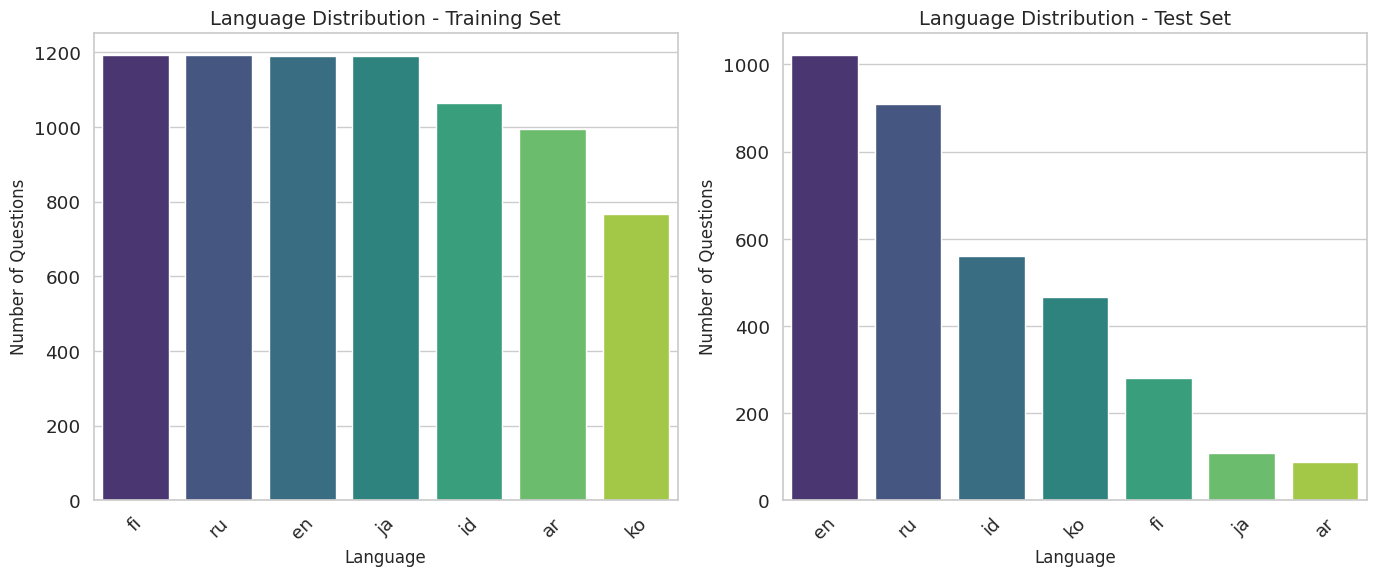

In [4]:
# Language distribution
print("Language distribution in training set:")
train_lang_dist = train_df['language'].value_counts().reset_index()
train_lang_dist.columns = ['Language', 'Count']
train_lang_dist['Percentage'] = 100 * train_lang_dist['Count'] / len(train_df)
display(train_lang_dist)

print("\nLanguage distribution in test set:")
test_lang_dist = test_df['language'].value_counts().reset_index()
test_lang_dist.columns = ['Language', 'Count']
test_lang_dist['Percentage'] = 100 * test_lang_dist['Count'] / len(test_df)
display(test_lang_dist)

# Plot language distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Language', y='Count', data=train_lang_dist, palette='viridis')
plt.title('Language Distribution - Training Set', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Language', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x='Language', y='Count', data=test_lang_dist, palette='viridis')
plt.title('Language Distribution - Test Set', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Language', fontsize=12)
plt.tight_layout()
plt.show()

## Question Type Distribution

Doing the same for question types allows us to identify any class imbalances that might affect our classification models.

Question type distribution in training set:


,Type,Count,Percentage
0,Content,3871,50.987882
1,Polar,3721,49.012118



Question type distribution in test set:


,Type,Count,Percentage
0,Content,1939,56.464764
1,Polar,1495,43.535236


/tmp/ipykernel_32243/74130406.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=train_type_dist, palette=['#2ecc71', '#3498db'])
/tmp/ipykernel_32243/74130406.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=test_type_dist, palette=['#2ecc71', '#3498db'])


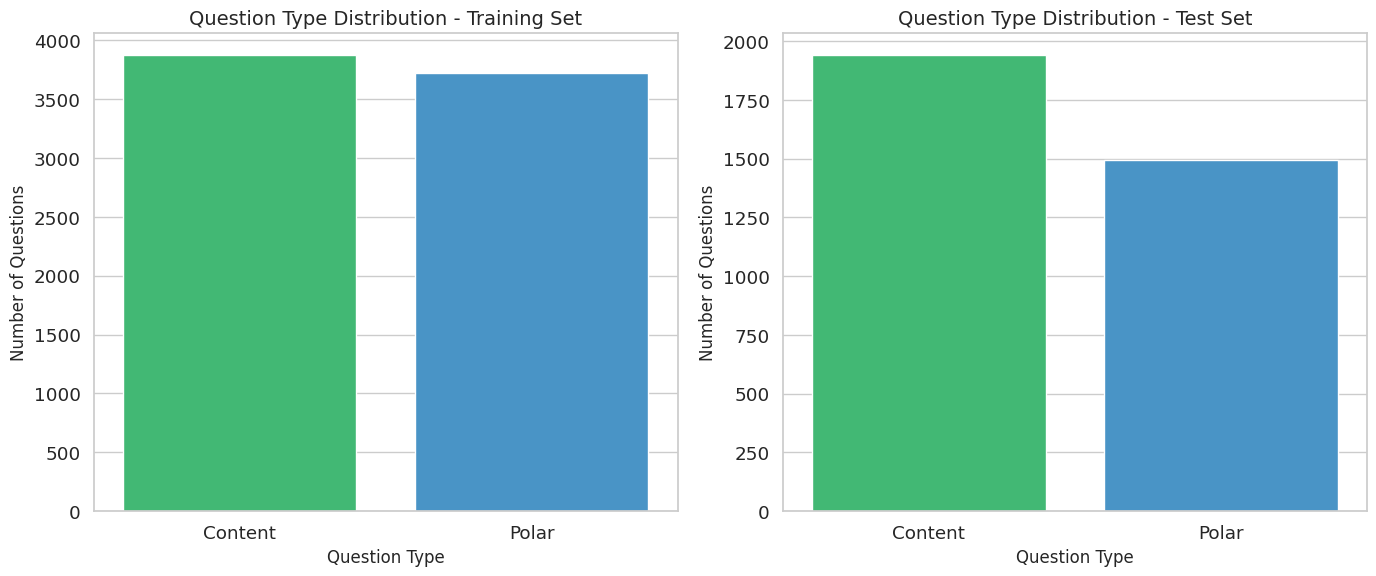

<Figure size 1400x700 with 0 Axes>

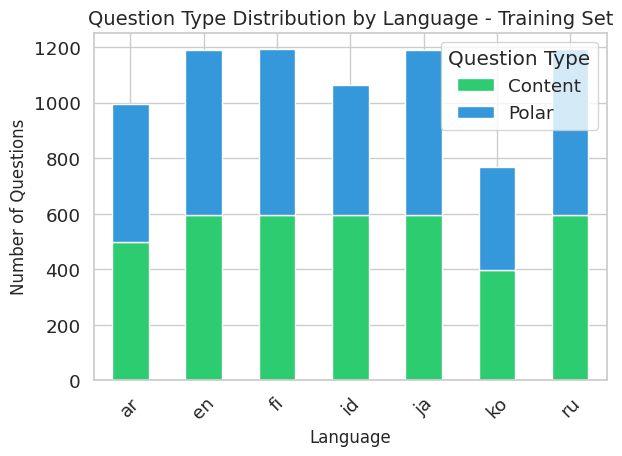

<Figure size 1400x700 with 0 Axes>

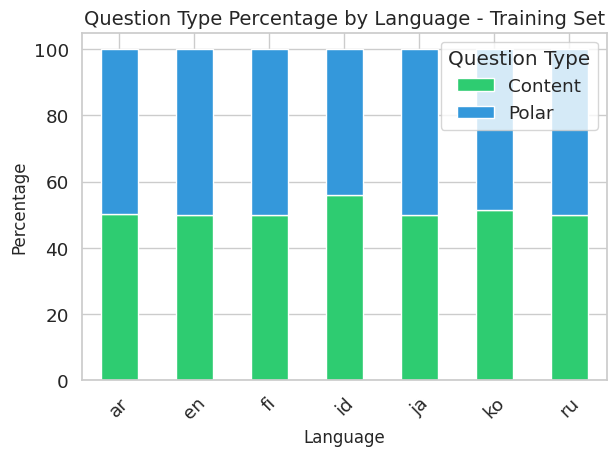

In [5]:
# Question type distribution
print("Question type distribution in training set:")
train_type_dist = train_df['question_type'].value_counts().reset_index()
train_type_dist.columns = ['Type', 'Count']
train_type_dist['Type'] = train_type_dist['Type'].map({0: 'Content', 1: 'Polar'})
train_type_dist['Percentage'] = 100 * train_type_dist['Count'] / len(train_df)
display(train_type_dist)

print("\nQuestion type distribution in test set:")
test_type_dist = test_df['question_type'].value_counts().reset_index()
test_type_dist.columns = ['Type', 'Count']
test_type_dist['Type'] = test_type_dist['Type'].map({0: 'Content', 1: 'Polar'})
test_type_dist['Percentage'] = 100 * test_type_dist['Count'] / len(test_df)
display(test_type_dist)

# Plot question type distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Type', y='Count', data=train_type_dist, palette=['#2ecc71', '#3498db'])
plt.title('Question Type Distribution - Training Set', fontsize=14)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Question Type', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x='Type', y='Count', data=test_type_dist, palette=['#2ecc71', '#3498db'])
plt.title('Question Type Distribution - Test Set', fontsize=14)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Question Type', fontsize=12)
plt.tight_layout()
plt.show()

# Question type distribution per language
plt.figure(figsize=(14, 7))
train_type_by_lang = pd.crosstab(train_df['language'], train_df['question_type'])
train_type_by_lang.columns = ['Content', 'Polar']
train_type_by_lang.plot(kind='bar', stacked=True, color=['#2ecc71', '#3498db'])
plt.title('Question Type Distribution by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

# Percentage of each question type by language
plt.figure(figsize=(14, 7))
percentage_by_lang = train_type_by_lang.div(train_type_by_lang.sum(axis=1), axis=0) * 100
percentage_by_lang.plot(kind='bar', stacked=True, color=['#2ecc71', '#3498db'])
plt.title('Question Type Percentage by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

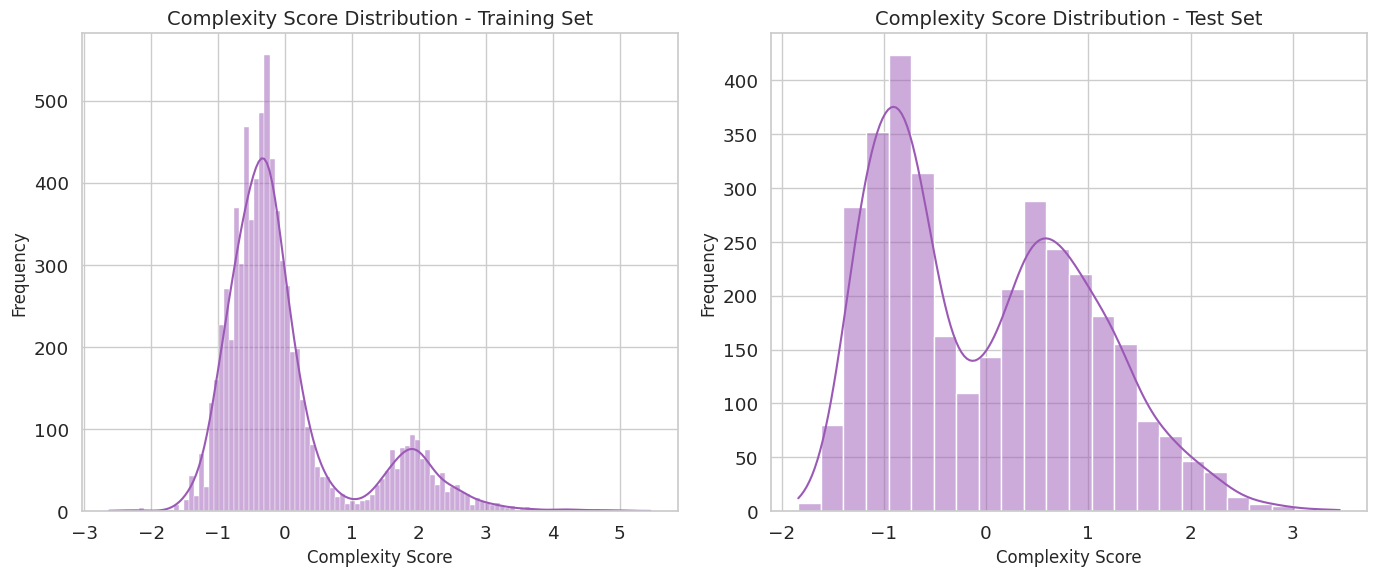

Complexity score statistics - Training set:


count    7592.000000
mean        0.000003
std         0.999995
min        -2.628000
25%        -0.598250
50%        -0.273000
75%         0.139250
max         5.462000
Name: complexity_score, dtype: float64


Complexity score statistics - Test set:


count    3434.000000
mean       -0.000006
std         0.999998
min        -1.837000
25%        -0.882750
50%        -0.104000
75%         0.785750
max         3.459000
Name: complexity_score, dtype: float64

/tmp/ipykernel_32243/1146850659.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='complexity_score', data=train_df, palette='viridis')


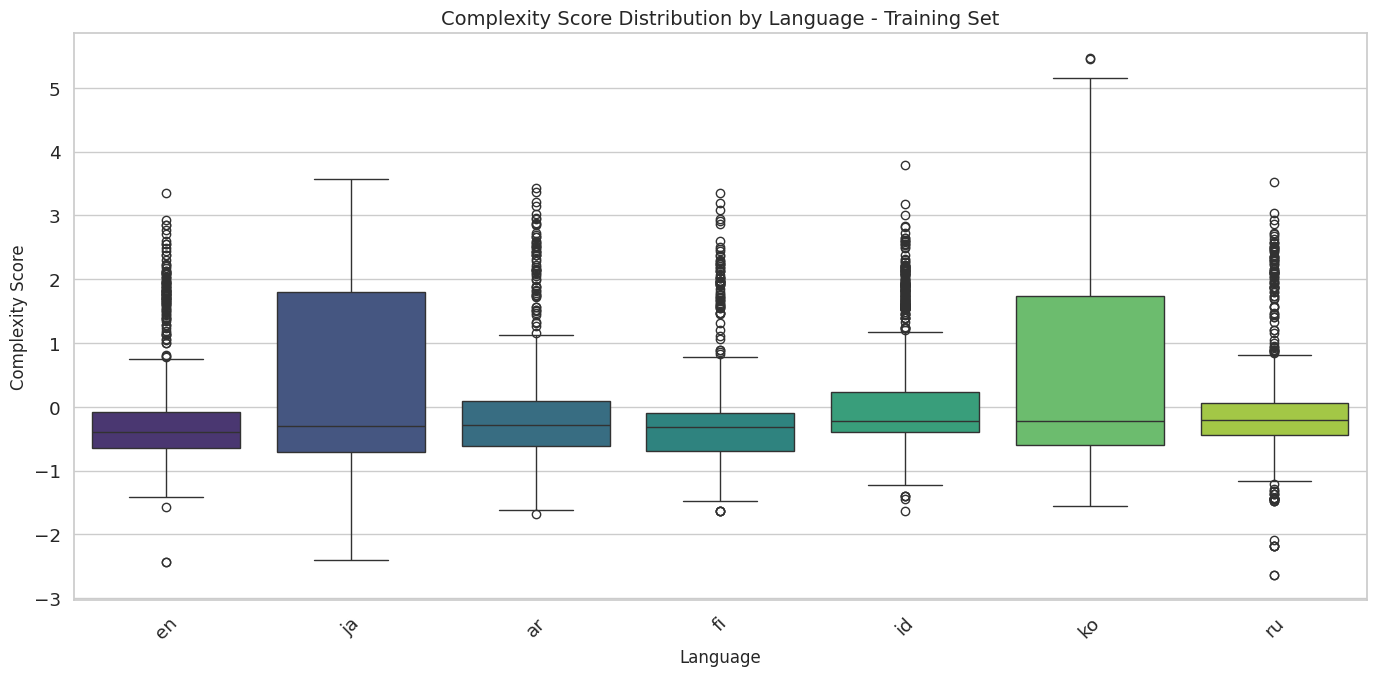

/tmp/ipykernel_32243/1146850659.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='question_type', y='complexity_score',


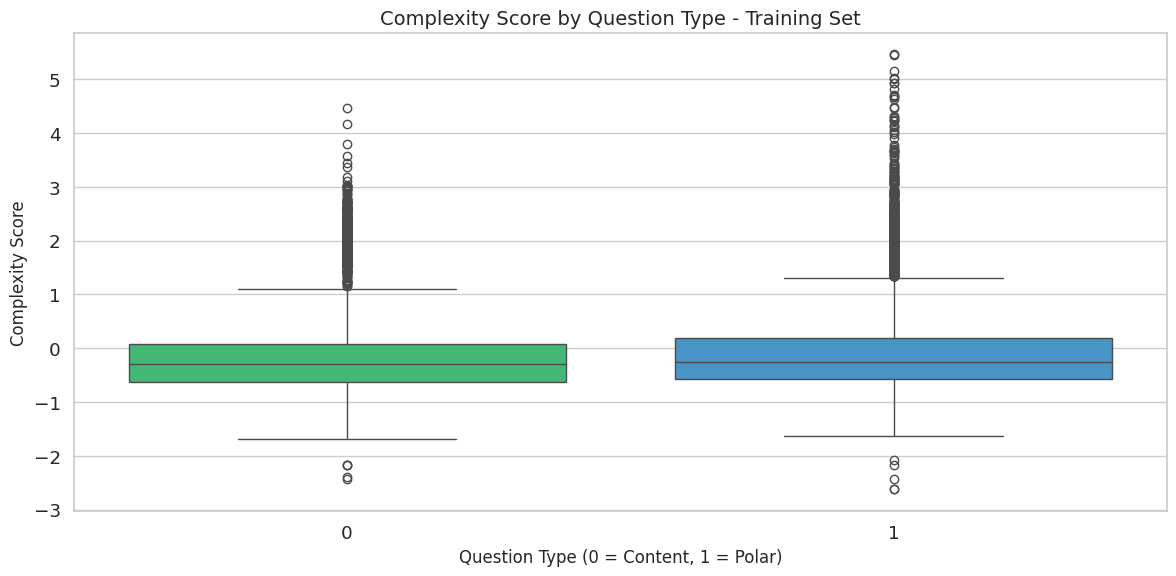

In [6]:
# Complexity score distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['complexity_score'], kde=True, color='#9b59b6')
plt.title('Complexity Score Distribution - Training Set', fontsize=14)
plt.xlabel('Complexity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(test_df['complexity_score'], kde=True, color='#9b59b6')
plt.title('Complexity Score Distribution - Test Set', fontsize=14)
plt.xlabel('Complexity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Complexity score statistics
print("Complexity score statistics - Training set:")
display(train_df['complexity_score'].describe())
print("\nComplexity score statistics - Test set:")
display(test_df['complexity_score'].describe())

# Complexity score boxplot by language
plt.figure(figsize=(14, 7))
sns.boxplot(x='language', y='complexity_score', data=train_df, palette='viridis')
plt.title('Complexity Score Distribution by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Complexity Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Complexity score by question type
plt.figure(figsize=(12, 6))
sns.boxplot(x='question_type', y='complexity_score', 
            data=train_df, 
            palette=['#2ecc71', '#3498db'])
plt.title('Complexity Score by Question Type - Training Set', fontsize=14)
plt.xlabel('Question Type (0 = Content, 1 = Polar)', fontsize=12)
plt.ylabel('Complexity Score', fontsize=12)
plt.tight_layout()
plt.show()

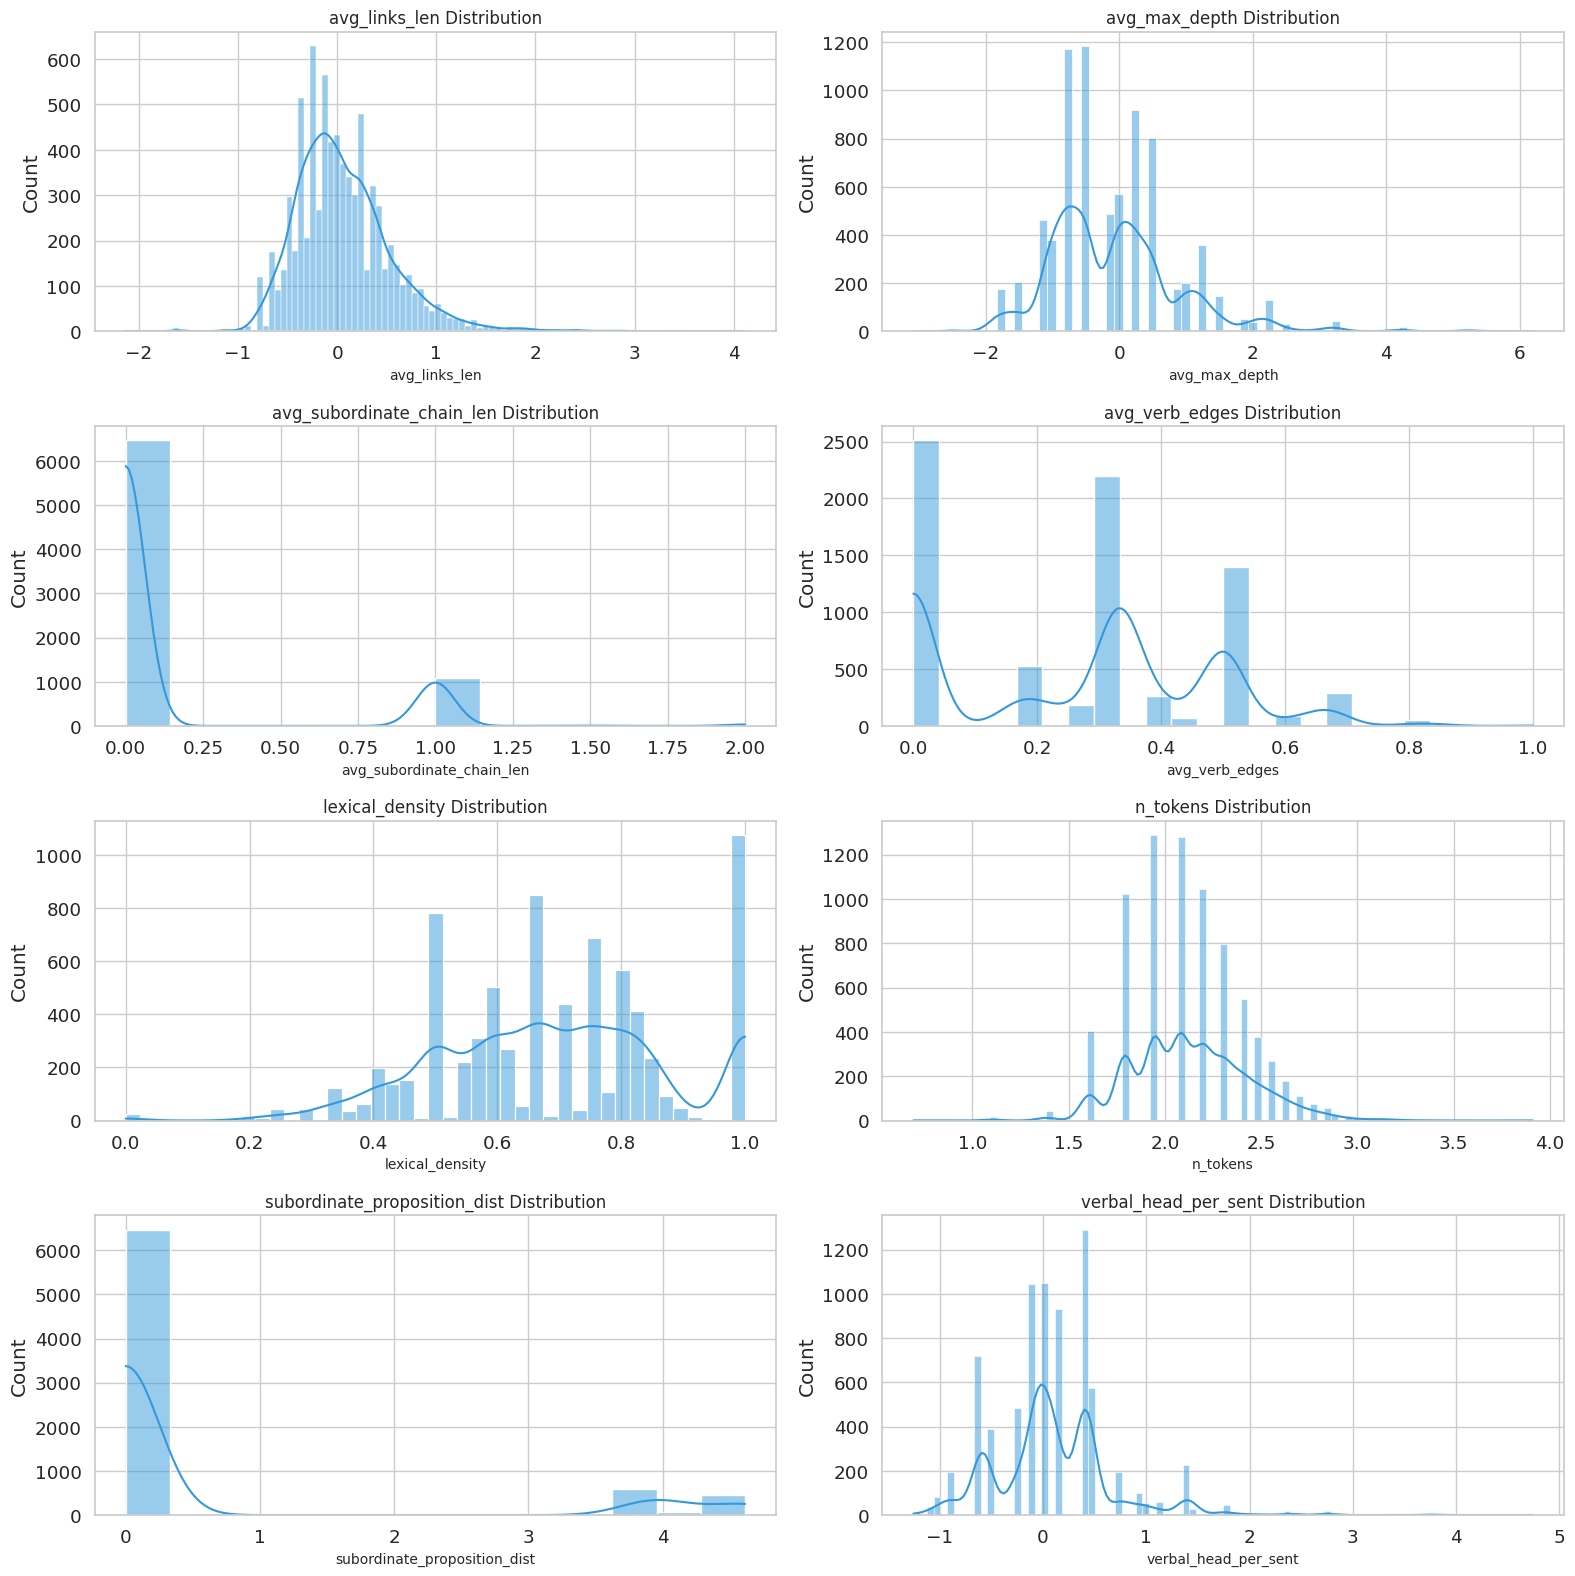

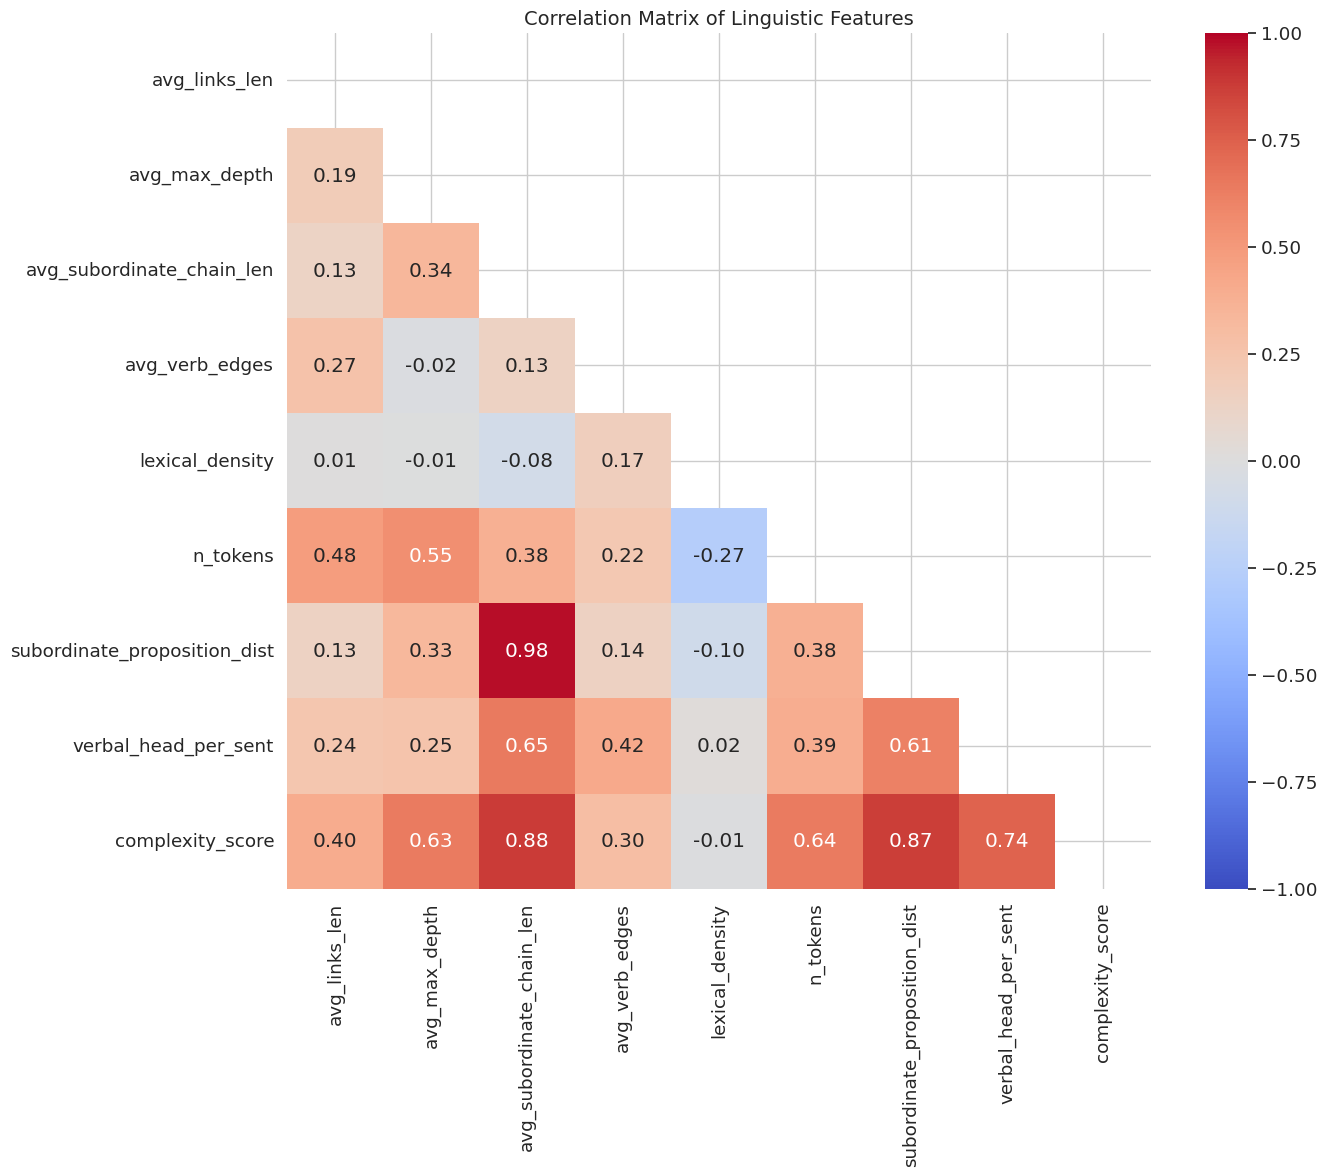

/tmp/ipykernel_32243/1980722989.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


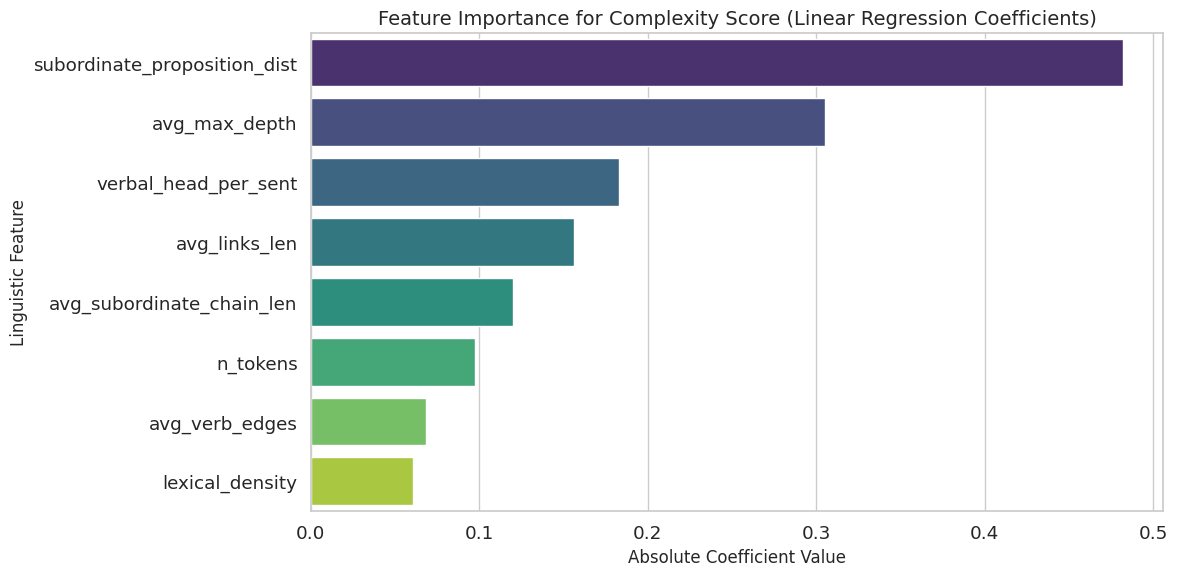

<Figure size 1600x1400 with 0 Axes>

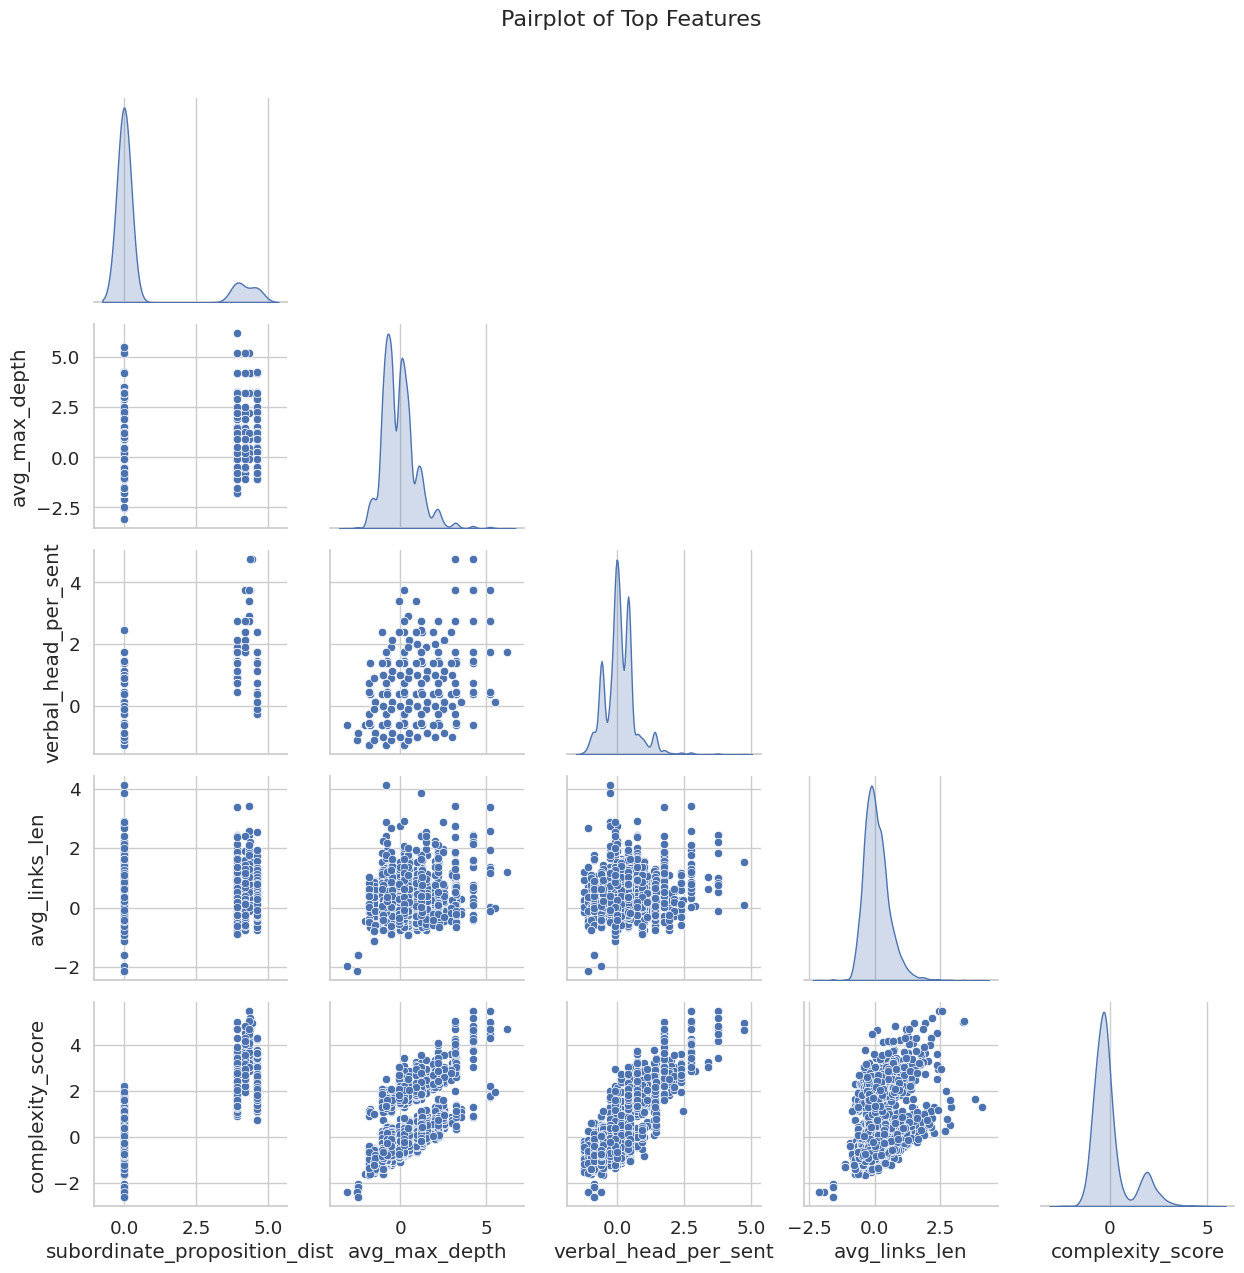

In [8]:
# List of linguistic features
linguistic_features = [
    'avg_links_len', 'avg_max_depth', 'avg_subordinate_chain_len',
    'avg_verb_edges', 'lexical_density', 'n_tokens',
    'subordinate_proposition_dist', 'verbal_head_per_sent'
]

# Distribution of each linguistic feature - Training set
plt.figure(figsize=(16, 16))
for i, feature in enumerate(linguistic_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(train_df[feature], kde=True, color='#3498db')
    plt.title(f'{feature} Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=10)
plt.tight_layout()
plt.show()

# Correlation between linguistic features
plt.figure(figsize=(14, 12))
corr_matrix = train_df[linguistic_features + ['complexity_score']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Linguistic Features', fontsize=14)
plt.tight_layout()
plt.show()

# Feature importance for complexity score - simple linear regression coefficients
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize features for fair comparison
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[linguistic_features])
y_train = train_df['complexity_score']

# Fit linear model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': linguistic_features,
    'Importance': np.abs(lr_model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Complexity Score (Linear Regression Coefficients)', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Linguistic Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Create a pairplot for the most important features
top_features = feature_importance.head(4)['Feature'].tolist() + ['complexity_score']
plt.figure(figsize=(16, 14))
sns.pairplot(train_df[top_features], corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Top Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

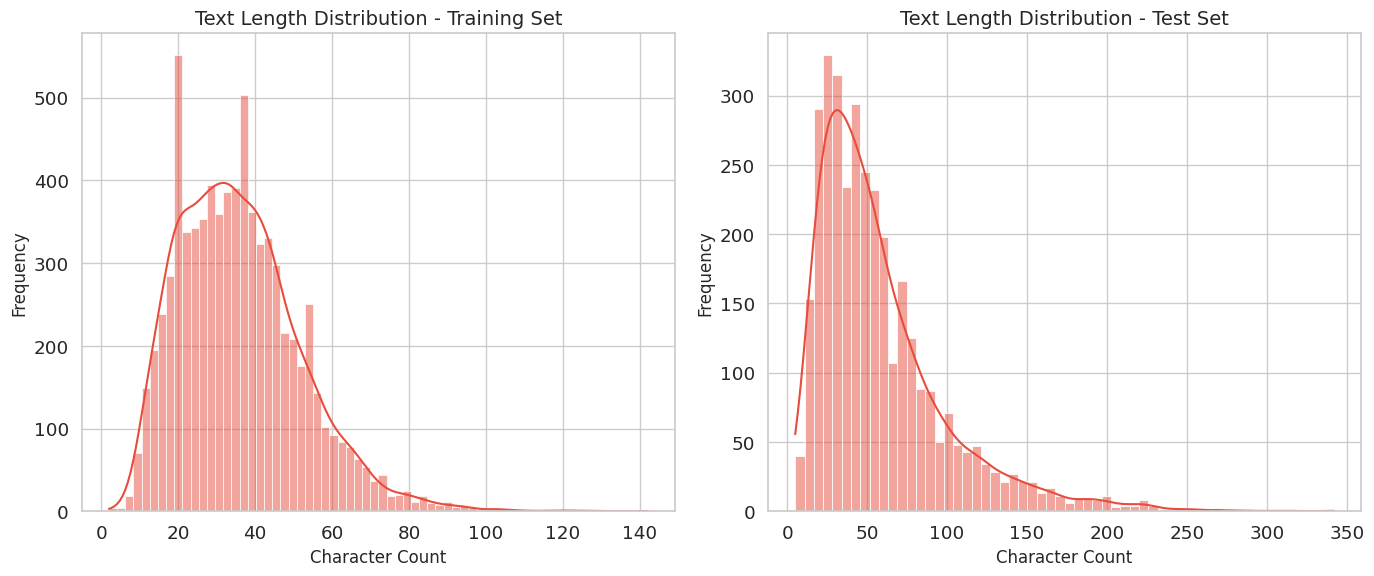

/tmp/ipykernel_32243/475737891.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='text_length', data=test_df, palette='viridis')


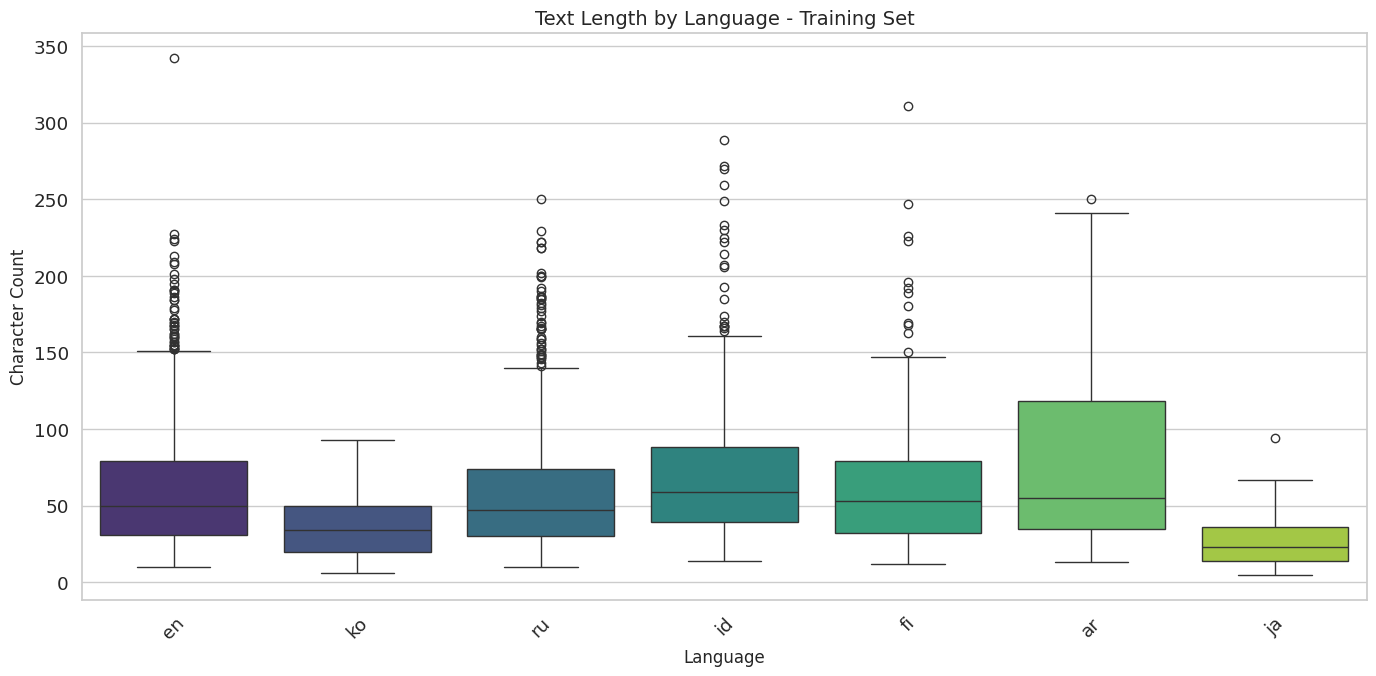

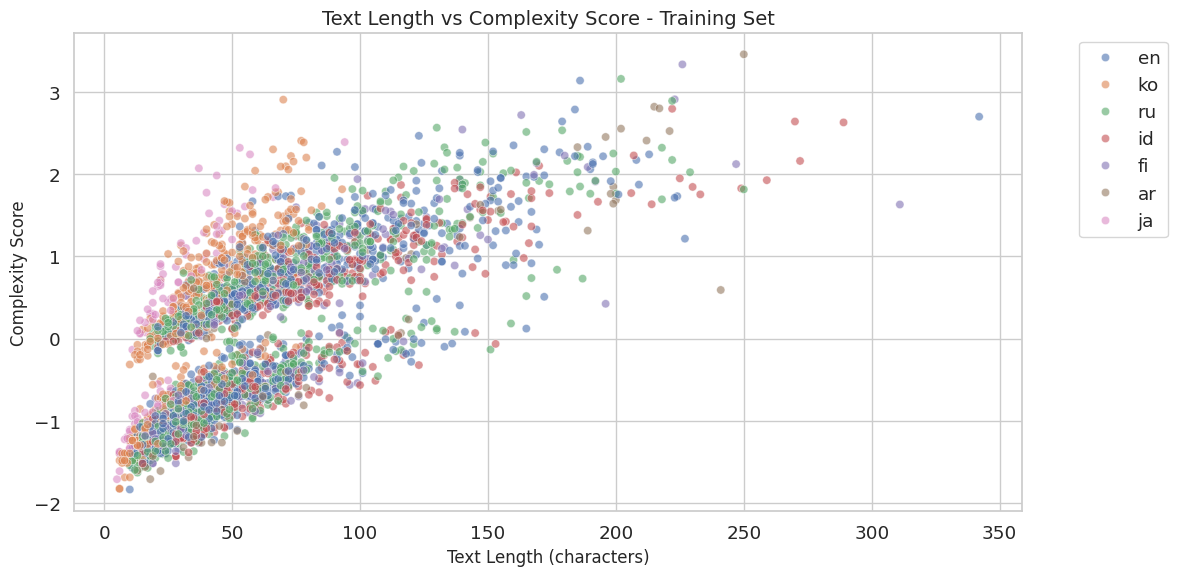

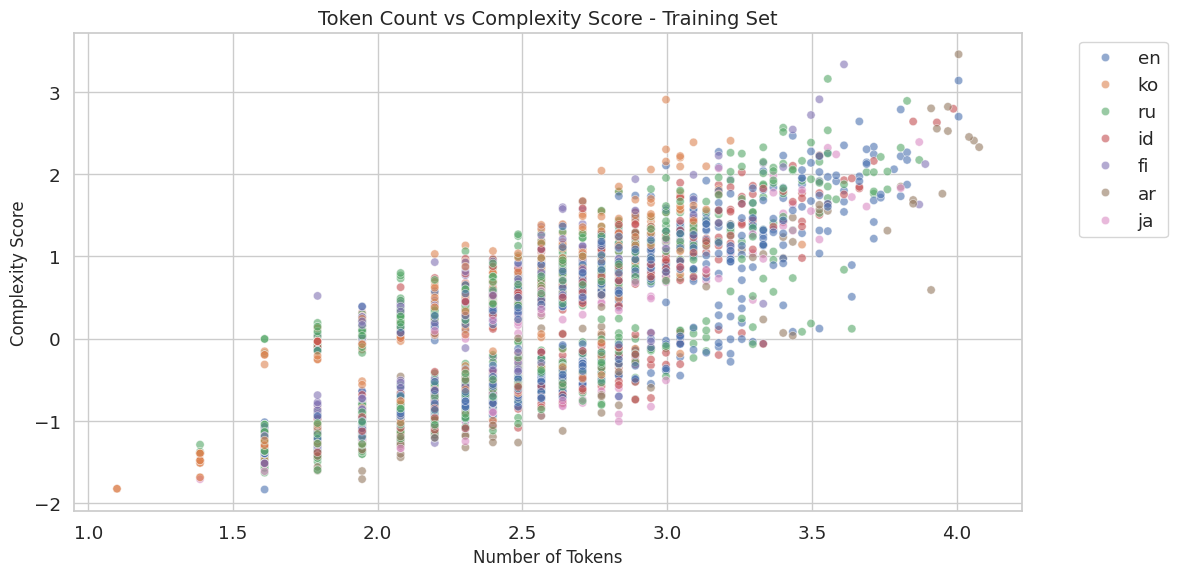

Sample Content Questions (low complexity):
[en] Joe? (Score: -2.43)
[ja] 『コール (Score: -2.40)
[ru] Норвегии? (Score: -2.18)

Sample Content Questions (high complexity):
[ko] 알고리즘의 특징 중 변하지 않는 명확한 작업 단계를 가지는 특징을 무엇이라 하나요? (Score: 4.46)
[ko] 멀티미디어에서 사용자의 상호작용을 제공하여 컴퓨터 게임이나 컴퓨터 기반 훈련을 사용하여 진행 상황을 제어할 수는 콘텐츠는 무엇을 말하나요? (Score: 4.17)
[id] Berapa lamakah yang diperlukan Sun Zi menulis buku The Art Of War? (Score: 3.79)

Sample Polar Questions (low complexity):
[ru] По (Score: -2.63)
[ru] M2 (Score: -2.63)
[en] game? (Score: -2.43)

Sample Polar Questions (high complexity):
[ko] 가톨릭 신자들은 모든 주일 (그리스도교)과 더불어 의무 대축일에 해당하는 천주의 성모 마리아 대축일(1월 1일), 주님 부활 대축일, 성모 승천 대축일(8월 15일), 주님 성탄 대축일(12월 25일)에 미사에 참례해야 하는 것이 기본적인 의무가 있나요? (Score: 5.46)
[ko] 자연주의는 가설을 세우고, 예측하고, 실험하고, 그 과정을 다시 반복하는 식의 과학적 방법만이, 진실을 규명하는 효율적인 방식이라는 관점인가요? (Score: 5.45)
[ko] 코스피 지수(KOrea composite Stock Price Index, 약어 :KOSPI)는 한국거래소의 유가증권시장에 상장된 회사들에 주식에 대한 총합인 시가총액의 기준시점과 비교시점을 비교하여 나타낸 지표인가요? (Score: 5.16)


In [10]:
# Text length distribution (character count)
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['text_length'], kde=True, color='#e74c3c')
plt.title('Text Length Distribution - Training Set', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(test_df['text_length'], kde=True, color='#e74c3c')
plt.title('Text Length Distribution - Test Set', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Text length by language
plt.figure(figsize=(14, 7))
sns.boxplot(x='language', y='text_length', data=test_df, palette='viridis')
plt.title('Text Length by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Character Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between text length and complexity score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='text_length', y='complexity_score', hue='language', data=test_df, alpha=0.6)
plt.title('Text Length vs Complexity Score - Training Set', fontsize=14)
plt.xlabel('Text Length (characters)', fontsize=12)
plt.ylabel('Complexity Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relationship between n_tokens and complexity score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_tokens', y='complexity_score', hue='language', data=test_df, alpha=0.6)
plt.title('Token Count vs Complexity Score - Training Set', fontsize=14)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Complexity Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Sample questions by type and complexity
print("Sample Content Questions (low complexity):")
for sample in train_df[train_df['question_type'] == 0].sort_values('complexity_score').head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

print("\nSample Content Questions (high complexity):")
for sample in train_df[train_df['question_type'] == 0].sort_values('complexity_score', ascending=False).head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

print("\nSample Polar Questions (low complexity):")
for sample in train_df[train_df['question_type'] == 1].sort_values('complexity_score').head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

print("\nSample Polar Questions (high complexity):")
for sample in train_df[train_df['question_type'] == 1].sort_values('complexity_score', ascending=False).head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

In [11]:
# Point-biserial correlation (appropriate for binary vs. continuous variables)
from scipy.stats import pointbiserialr

# Overall correlation
correlation, p_value = pointbiserialr(train_df['question_type'], train_df['complexity_score'])
print(f"Overall correlation: r = {correlation:.4f}, p = {p_value:.4g}")

# Correlation per language (to identify language-specific patterns)
print("\nCorrelation by language:")
for lang in train_df['language'].unique():
    lang_df = train_df[train_df['language'] == lang]
    corr, p = pointbiserialr(lang_df['question_type'], lang_df['complexity_score'])
    print(f"{lang}: r = {corr:.4f}, p = {p:.4g}")

Overall correlation: r = 0.0438, p = 0.0001338

Correlation by language:
en: r = -0.1034, p = 0.0003492
ja: r = -0.1169, p = 5.322e-05
ar: r = 0.1626, p = 2.532e-07
fi: r = 0.0083, p = 0.7751
id: r = 0.0282, p = 0.3575
ko: r = 0.2783, p = 4.013e-15
ru: r = 0.1534, p = 1.018e-07


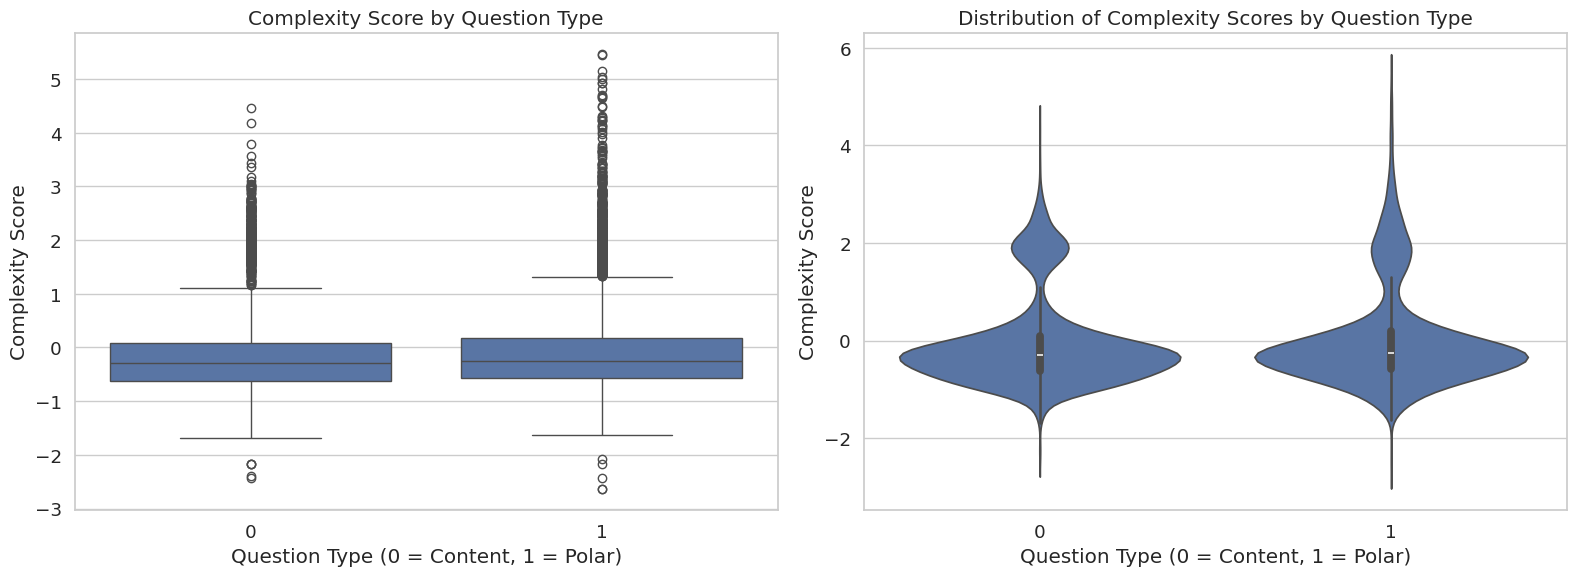

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(x='question_type', y='complexity_score', data=train_df, ax=ax1)
ax1.set_title('Complexity Score by Question Type')
ax1.set_xlabel('Question Type (0 = Content, 1 = Polar)')
ax1.set_ylabel('Complexity Score')

# Violin plot for distribution shapes
sns.violinplot(x='question_type', y='complexity_score', data=train_df, ax=ax2)
ax2.set_title('Distribution of Complexity Scores by Question Type')
ax2.set_xlabel('Question Type (0 = Content, 1 = Polar)')
ax2.set_ylabel('Complexity Score')

plt.tight_layout()
plt.savefig('complexity_by_question_type.png')
plt.show()

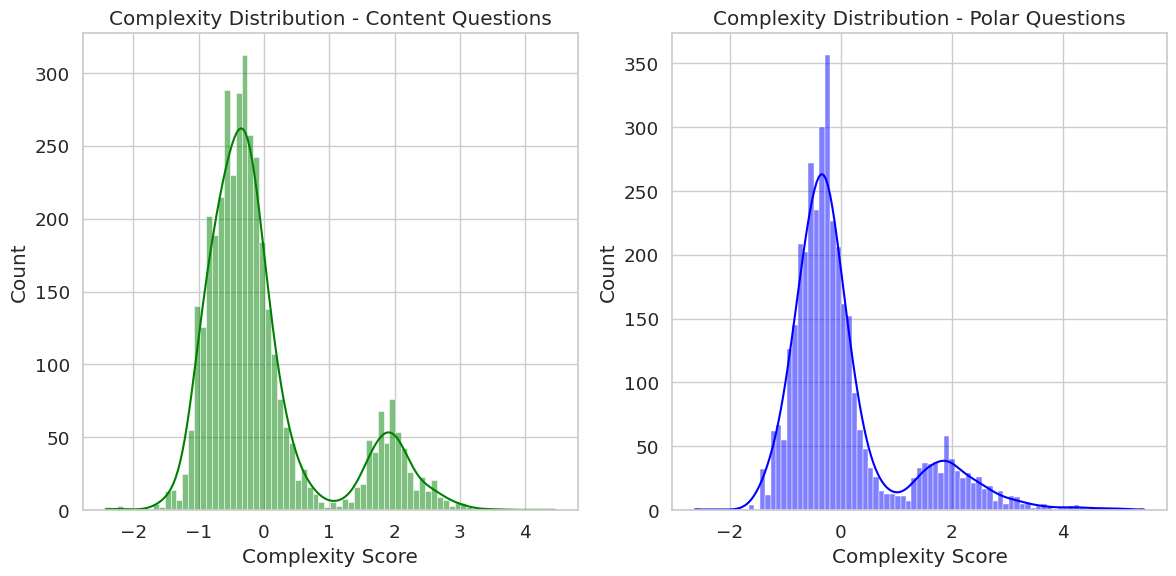

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df[train_df['question_type'] == 0]['complexity_score'], 
             kde=True, color='green', label='Content')
plt.title('Complexity Distribution - Content Questions')
plt.xlabel('Complexity Score')

plt.subplot(1, 2, 2)
sns.histplot(train_df[train_df['question_type'] == 1]['complexity_score'], 
             kde=True, color='blue', label='Polar')
plt.title('Complexity Distribution - Polar Questions')
plt.xlabel('Complexity Score')

plt.tight_layout()
plt.savefig('complexity_histograms_by_type.png')
plt.show()

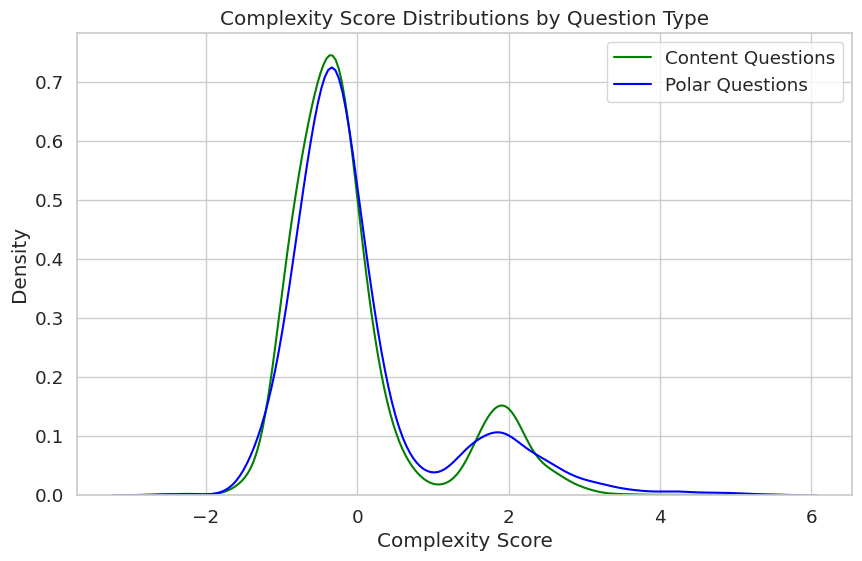

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df[train_df['question_type'] == 0]['complexity_score'], 
            label='Content Questions', color='green')
sns.kdeplot(train_df[train_df['question_type'] == 1]['complexity_score'], 
            label='Polar Questions', color='blue')
plt.title('Complexity Score Distributions by Question Type')
plt.xlabel('Complexity Score')
plt.ylabel('Density')
plt.legend()
plt.savefig('complexity_kde_by_type.png')
plt.show()

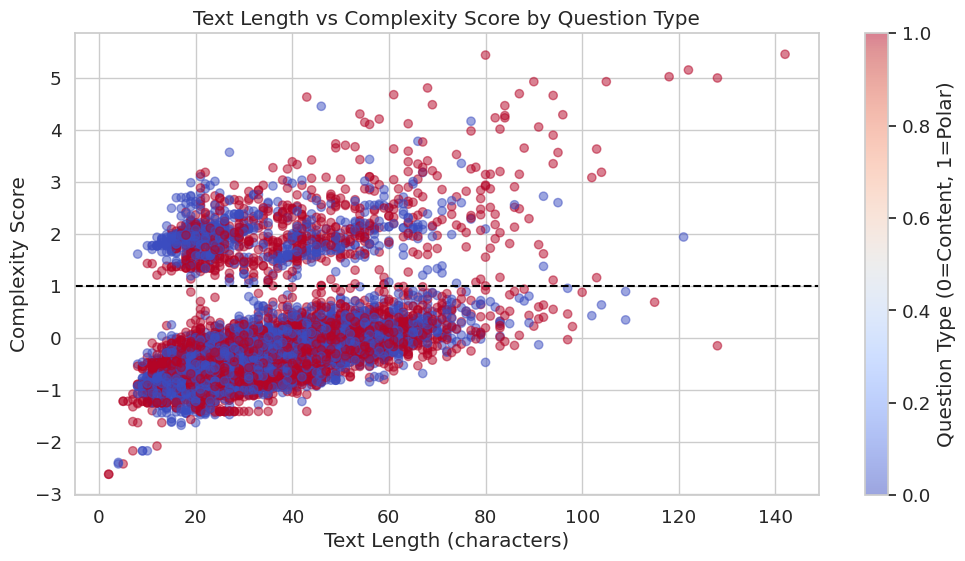

Percentage of question types within each complexity band:
question_type      Content      Polar
complexity_band                      
Lower Band       51.328259  48.671741
Upper Band       49.090909  50.909091


In [15]:
# Create a scatter plot colored by question type
plt.figure(figsize=(12, 6))

# Plot with question type coloring
scatter = plt.scatter(
    train_df['text_length'], 
    train_df['complexity_score'],
    c=train_df['question_type'],
    alpha=0.5,
    cmap='coolwarm'
)

# Add threshold line between the two bands (approximately at 1.0)
plt.axhline(y=1.0, color='black', linestyle='--')
plt.colorbar(scatter, label='Question Type (0=Content, 1=Polar)')
plt.title('Text Length vs Complexity Score by Question Type')
plt.xlabel('Text Length (characters)')
plt.ylabel('Complexity Score')
plt.savefig('bimodal_by_question_type.png')
plt.show()

# Calculate the percentage of each question type in upper/lower bands
threshold = 1.0
train_df['complexity_band'] = np.where(train_df['complexity_score'] > threshold, 
                                      'Upper Band', 'Lower Band')

# Create a crosstab of band vs question type
band_type_tab = pd.crosstab(
    train_df['complexity_band'], 
    train_df['question_type'].map({0: 'Content', 1: 'Polar'}),
    normalize='index'
) * 100

print("Percentage of question types within each complexity band:")
print(band_type_tab)

In [21]:
from scipy.stats import ttest_ind

content_scores = train_df[train_df['question_type'] == 0]['complexity_score']
polar_scores = train_df[train_df['question_type'] == 1]['complexity_score']

t_stat, p_val = ttest_ind(content_scores, polar_scores, equal_var=False)
print(f"T-test comparing complexity between question types: t={t_stat:.4f}, p={p_val:.4g}")

# Descriptive statistics
stats = train_df.groupby('question_type')['complexity_score'].describe().reset_index()
stats['question_type'] = stats['question_type'].map({0: 'Content', 1: 'Polar'})

print("\nComplexity score statistics by question type:")
print(stats)

T-test comparing complexity between question types: t=-3.8133, p=0.0001383

Complexity score statistics by question type:
  question_type   count      mean       std    min    25%    50%    75%    max
0       Content  3871.0 -0.042958  0.944731 -2.429 -0.629 -0.291  0.085  4.460
1         Polar  3721.0  0.044695  1.052686 -2.628 -0.578 -0.261  0.185  5.462
